<a href="https://colab.research.google.com/github/dbowling21/Climbing-Route-Detection/blob/main/ClimbingRouteDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<IPython.core.display.Javascript object>

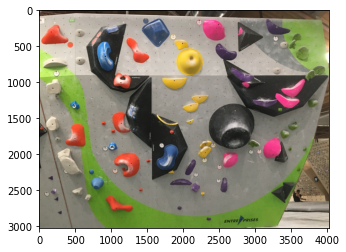

What color route would you like to climb?
green, yellow, orange, pink, blue, purple
Enter Color: pink


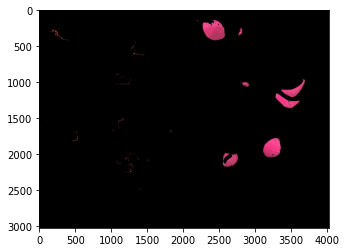

After opening


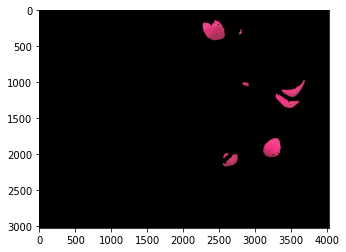

After closing


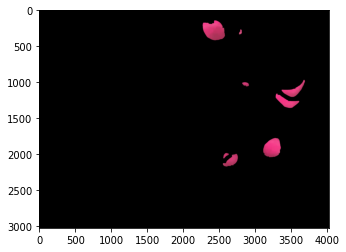

Combined Image


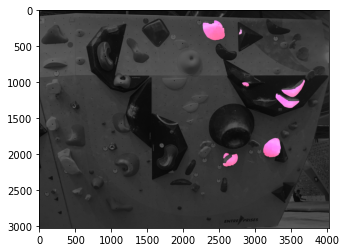

Binary Threshold


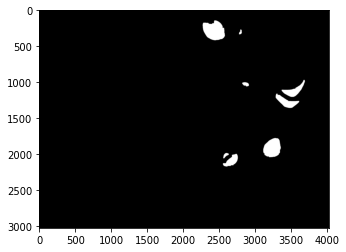

With Contours Drawn


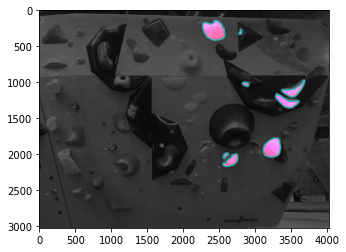

cntAreas:  [19211.0, 2908.0, 49591.5, 27215.0, 3769.0, 25670.5, 1646.5, 61991.0]
average Size of Holds:  24000.3125
average Size Dif:  26165.23214285714 

~~~~~~~~~~~~~~~~~~~~~ Final Output ~~~~~~~~~~~~~~~~~~~~~
This routes hold sizes are similar, this may be an easy route


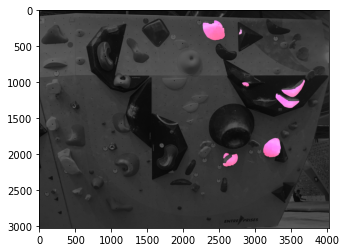

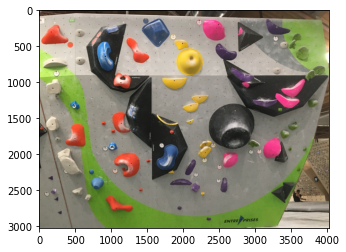

What color route would you like to climb?
green, yellow, orange, pink, blue, purple
Enter Color: yellow


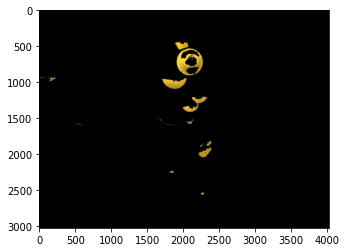

After opening


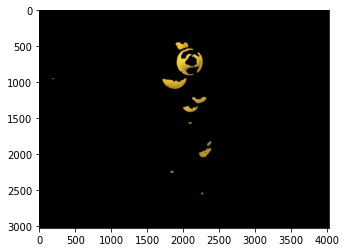

After closing


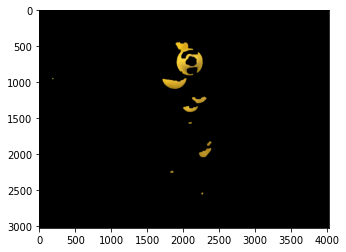

Combined Image


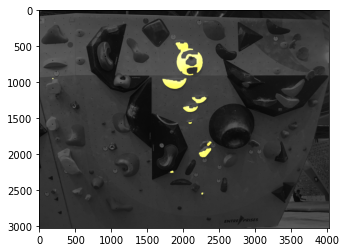

Binary Threshold


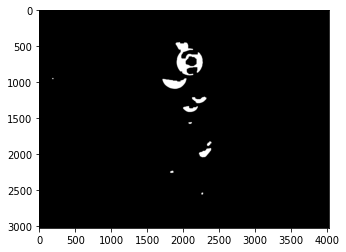

With Contours Drawn


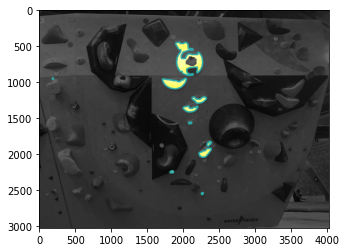

cntAreas:  [545.5, 1076.0, 11685.0, 2252.0, 867.5, 10281.0, 10016.5, 29906.0, 230.0, 92790.5]
average Size of Holds:  15965.0
average Size Dif:  25067.444444444445 

~~~~~~~~~~~~~~~~~~~~~ Final Output ~~~~~~~~~~~~~~~~~~~~~
This routes hold sizes vary, this may be a harder route


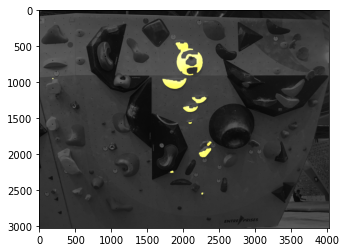

In [ ]:
import cv2
import math
import time
import itertools
import numpy as np
from PIL import Image

from matplotlib import pyplot

#increases output cell to remove scroll bar
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
 
def show(image, color):
    """ Helper method to display a single image 
    with pyplot """
    if (color == "gray"):
        pyplot.imshow(image, cmap="gray")
    else:
        pyplot.imshow(image)
    pyplot.show()


def holds(image, choice):
    high, low = choice
    color_mask = cv2.inRange(image, low, high)
    return cv2.bitwise_and(image, image, mask=color_mask)

def chooseRoute():      
  # read input image
  wall = cv2.imread("test2.JPG")
  length, width, depth = wall.shape

  # Convert color from BGR to RGB
  wall = cv2.cvtColor(wall, cv2.COLOR_BGR2RGB)

  # make black and white version
  wall_gray = cv2.cvtColor(wall, cv2.COLOR_RGB2GRAY)
  
  # use color mask to isolate holds
  green_high = (160, 210, 120)
  green_low = (80, 130, 30)
  yellow_high = (255, 255, 75)
  yellow_low = (155, 120, 0)
  orange_high = (255, 90, 75)
  orange_low = (115, 50, 30)
  pink_high = (255, 95, 160)
  pink_low = (160, 40, 70)
  blue_high = (100, 155, 255)
  blue_low = (25, 66, 85)
  purple_high = (105, 72, 105)
  purple_low = (50, 40, 60)
  white_high = (200, 200, 200)
  white_low = (150, 150, 150)

  color_dictionary = {
      "green"  : (green_high, green_low),
      "yellow" : (yellow_high, yellow_low),
      "orange" : (orange_high, orange_low),
      "pink"   : (pink_high, pink_low),
      "blue"   : (blue_high, blue_low),
      "purple" : (purple_high, purple_low),
      "white" : (white_high, white_low),
  }

  show(wall, "RGB")
  print("What color route would you like to climb?")
  print("green, yellow, orange, pink, blue, purple")
  time.sleep(2)
  colorHold = input("Enter Color: ")
  high, low = color_dictionary[colorHold]
  color_mask = cv2.inRange(wall, low, high)
  holds = cv2.bitwise_and(wall, wall, mask=color_mask)

  show(holds, "RGB")

  #~~~~~~~ perform opening on the isolated holds ~~~~~~~~~
  kernel = np.ones((15,15), np.uint8)
  opening = cv2.morphologyEx(holds ,cv2.MORPH_OPEN, kernel)
  print("After opening")
  show(opening, "RGB")

  #~~~~~~~ perform closing after opening ~~~~~~~~~
  kernel = np.ones((35,35), np.uint8)
  closing = cv2.morphologyEx(opening ,cv2.MORPH_CLOSE, kernel)
  print("After closing")
  show(closing, "RGB")
 
  '''#~~~~~~~ perform closing a second time ~~~~~~~~~
  kernel = np.ones((100,100), np.uint8)
  closing = cv2.morphologyEx(closing ,cv2.MORPH_CLOSE, kernel)
  print("After closing again")
  show(closing, "RGB") '''

  #~~~~~~~ display the cleaned holds over a gray image of the wall ~~~~~~~
  wall_gray = cv2.cvtColor(wall_gray, cv2.COLOR_GRAY2BGR)
  combinedImg = cv2.addWeighted(closing, 1.5, wall_gray, 0.4, 0)
  print("Combined Image") 
  show(combinedImg, "RGB")

  #~~~~~~~ threshold the cleaned img of the holds to find contours ~~~~~~~~~
  gray = cv2.cvtColor(closing, cv2.COLOR_BGR2GRAY)
  blur = cv2.medianBlur(gray, 5)
  thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY)[1]
  contour = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  contour = contour[0] if len(contour) == 2 else contour[1]

  #~~~~~~ draw the countours in cyan and add each cnt's area to a list ~~~~~~~
  cntAreas = []
  withCnts = combinedImg.copy()
  for c in contour:
      cv2.drawContours(withCnts,[c], -1, (43,171,171), 20)
      cntAreas.append(cv2.contourArea(c))
  thresh = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)
  print("Binary Threshold")
  show(thresh, "RGB")
  print("With Contours Drawn")
  show(withCnts, "RGB")

  #~~~~~~ compare avg hold size versus avg difference between hold sizes ~~~~~~~
  print("cntAreas: ", cntAreas)
  avgSize = sum(cntAreas)/len(cntAreas)
  print("average Size of Holds: ", avgSize)
  sizeDif = [abs(e[1] - e[0]) for e in itertools.permutations(cntAreas, 2)]
  sizeDif = sum(sizeDif)/len(sizeDif)
  print("average Size Dif: ", sizeDif, "\n")

  #~~~~~~~~~~ Final outputs ~~~~~~~~~~~
  print("~~~~~~~~~~~~~~~~~~~~~ Final Output ~~~~~~~~~~~~~~~~~~~~~")
  if avgSize > (sizeDif + 2000) or avgSize < (sizeDif - 4000):
    print("This routes hold sizes vary, this may be a harder route")
  else:
    print("This routes hold sizes are similar, this may be an easy route")
  show(combinedImg, "RGB")

chooseRoute()
chooseRoute()


